In [84]:
import warnings
import itertools
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import linear_model
from scipy.stats import norm
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error, precision_score, accuracy_score, classification_report

### Feature Importance & Model Building

In [85]:
df = pd.read_csv(r'C:\Users\annak\OneDrive\Desktop\Data Science Capstone\kaggle_survey_2021_responses.csv')
df

<ipython-input-85-f2bccf692c60>:1: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\annak\OneDrive\Desktop\Data Science Capstone\kaggle_survey_2021_responses.csv')


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
question_names = df.iloc[0]
df = df.drop(0, axis=0)
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
print(question_names['Q25'])

What is your current yearly compensation (approximate $USD)?


In [88]:
df = df[df['Q25'].notnull()]
df = df[df['Q25'] != 'I do not wish to disclose my approximate yearly compensation']
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25967,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25968,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [89]:
print(df['Q25'].unique())

['25,000-29,999' '60,000-69,999' '$0-999' '30,000-39,999' '15,000-19,999'
 '70,000-79,999' '2,000-2,999' '10,000-14,999' '5,000-7,499'
 '20,000-24,999' '1,000-1,999' '100,000-124,999' '7,500-9,999'
 '4,000-4,999' '40,000-49,999' '50,000-59,999' '3,000-3,999'
 '300,000-499,999' '200,000-249,999' '125,000-149,999' '250,000-299,999'
 '80,000-89,999' '90,000-99,999' '150,000-199,999' '>$1,000,000'
 '$500,000-999,999']


In [90]:
dic = {'$0-999': 500, '1,000-1,999': 1500, '2,000-2,999': 2500, '3,000-3,999': 3500, 
       '4,000-4,999': 4500, '5,000-7,499': 6250, '7,500-9,999': 8750, '10,000-14,999': 12500, 
       '15,000-19,999': 17500, '20,000-24,999': 22500, '25,000-29,999': 27500, 
       '30,000-39,999': 35000, '40,000-49,999': 45000, '50,000-59,999': 55000, 
       '60,000-69,999': 65000, '70,000-79,999': 75000, '80,000-89,999': 85000, '90,000-99,999': 95000,
       '100,000-124,999': 112500, '125,000-149,999': 137500, '150,000-199,999': 175000, 
       '200,000-249,999': 225000, '250,000-299,999': 275000, '300,000-499,999': 400000,
       '$500,000-999,999': 750000, '>$1,000,000': 1000000}

df['target'] = df['Q25'].apply(lambda x: dic[x])

In [91]:
print(question_names['Q1'])
print(question_names['Q2'])
print(question_names['Q3'])
print(question_names['Q4'])
print(question_names['Q5'])
print(question_names['Q6'])
print(question_names['Q20'])

What is your age (# years)?
What is your gender? - Selected Choice
In which country do you currently reside?
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Select the title most similar to your current role (or most recent title if retired): - Selected Choice
For how many years have you been writing code and/or programming?
In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice


In [92]:
features = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q20"]
target = ["target"]

df = df[features + target]

df = df.fillna('?')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q20,target
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Manufacturing/Fabrication,27500
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Manufacturing/Fabrication,65000
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Academics/Education,500
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Academics/Education,35000
5,45-49,Man,India,Doctoral degree,Other,< 1 years,Academics/Education,35000


In [93]:
dic_age = {'30-34': 32, '22-24': 23, '35-39': 37, '18-21': 20, '40-44': 42, '25-29': 27, '55-59': 57, '60-69': 64, '45-49': 47, '50-54': 52, '70+': 75}
df['Q1'] = df['Q1'].apply(lambda x: dic_age[x])

In [94]:
dic_exp = {'< 1 years': 0.5, '1-3 years': 2, '3-5 years': 4, '5-10 years': 7.5, '10-20 years': 15, '20+ years': 22, 'I have never written code': 0}
df['Q6'] = df['Q6'].apply(lambda x: dic_exp[x])

In [95]:
for q in ["Q2", "Q3", "Q4", "Q5", "Q20"]:
    df[q] = df[q].astype('category')
    
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [96]:
df = df.rename(index=str, columns={"Q1": 'Age', "Q2": 'Gender', "Q3": 'Country of Residence', "Q4": 'Education Level', "Q5": 'Job Title', "Q6": 'Programming Experience', "Q20": 'Industry'})

In [97]:
classes = ['less than 10k', 'between 10k and 30k', 'between 30k and 50k', 'between 50k and 80k', 'between 80k and 100k', 'between 100k and 500k', 'more than 500k']

In [98]:
print(df['target'].unique())

[  27500   65000     500   35000   17500   75000    2500   12500    6250
   22500    1500  112500    8750    4500   45000   55000    3500  400000
  225000  137500  275000   85000   95000  175000 1000000  750000]


In [99]:
dic_target = {500: 0, 1500: 0, 2500: 0, 3500: 0, 4500: 0, 6250: 0, 8750: 0, 
              12500: 1, 17500: 1, 22500: 1, 27500: 1,
              35000: 2, 45000: 2, 
              55000: 3,  65000: 3,  75000: 3,
              85000: 4, 95000: 4, 
              112500: 5, 137500: 5, 175000: 5, 225000: 5, 275000: 5, 400000: 5, 
              750000: 6,  1000000: 6
             }

df['target'] = df['target'].apply(lambda x: dic_target[x])

In [100]:
df

,Age,Gender,Country of Residence,Education Level,Job Title,Programming Experience,Industry,target
1,52,0,23,0,7,7.5,8,1
2,52,0,24,3,9,22.0,8,3
3,23,0,41,3,11,2.0,0,0
4,47,0,34,1,10,22.0,0,2
5,47,0,23,1,7,0.5,0,2
...,...,...,...,...,...,...,...,...
25967,32,0,23,0,2,2.0,8,0
25968,37,0,51,0,11,7.5,3,4
25969,32,0,15,0,2,2.0,3,1
25971,52,0,54,1,10,0.0,0,0


In [101]:
features = ['Age', 'Gender', 'Country of Residence', 'Education Level', 'Job Title', 'Programming Experience', 'Industry']
target =['target']

In [102]:
X = df[features]
y = df[target]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [104]:
clf = lgb.LGBMClassifier(random_state=42, n_estimators=50, num_leaves=30, learning_rate=0.1)
clf.fit(X_train, y_train)

C:\Users\annak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGBMClassifier(n_estimators=50, num_leaves=30, random_state=42)

In [105]:
y_pred=clf.predict(X_test)

In [106]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

0.5456907752273712


In [107]:
y_pred_train = clf.predict(X_train)
print(accuracy_score(y_train, y_pred_train))

0.6515362480274761


In [108]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.6515
Test set score: 0.5457


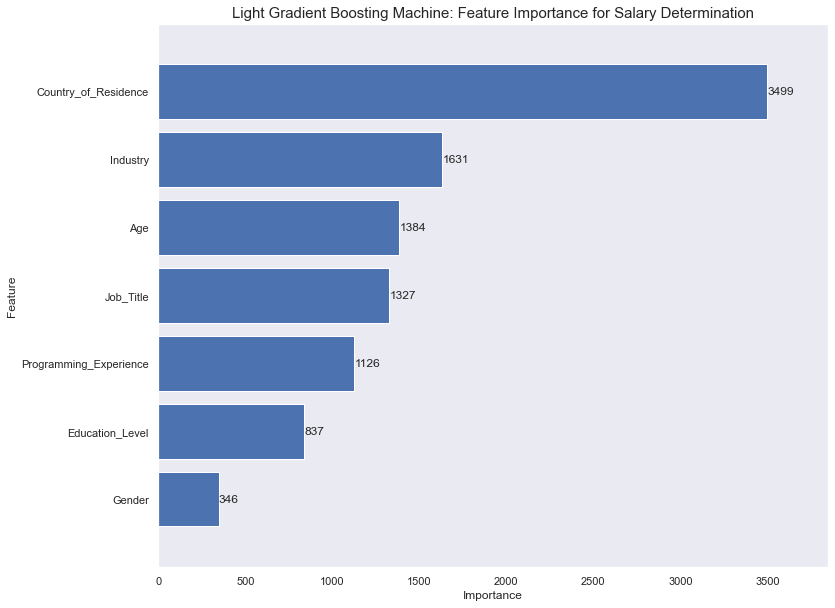

In [109]:
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(clf, importance_type='split', max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.ylabel('Feature', size=12)
plt.xlabel('Importance', size=12)
plt.title("Light Gradient Boosting Machine: Feature Importance for Salary Determination", fontsize=15)
plt.show()

In [110]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1792  124   22   68    6   60    0]
 [ 531  160   27   28    2   20    0]
 [ 196   75   48   73    3   21    0]
 [ 188   61   41  140   19   78    0]
 [  42   14   18   59    9   73    0]
 [ 103   26   14   71    8  371    2]
 [  11    2    0    2    0   10    0]]


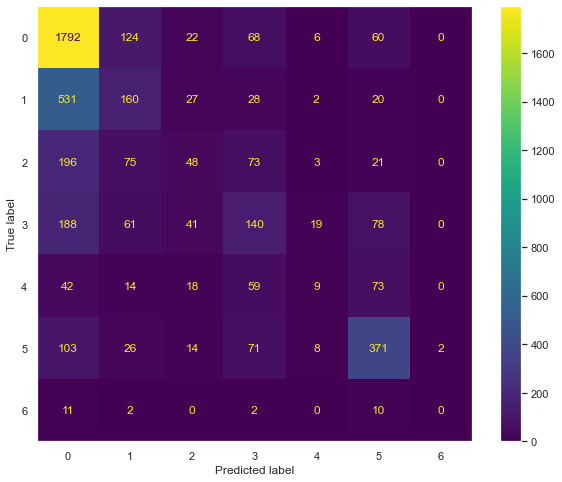

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.grid(False)

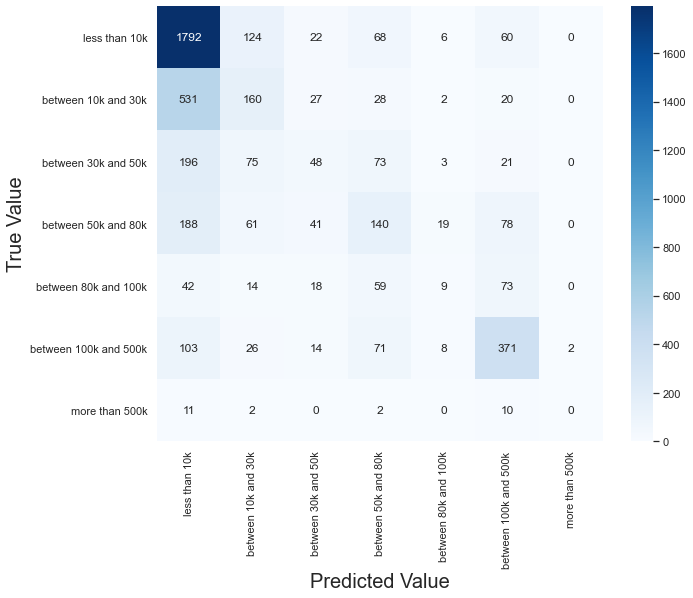

In [112]:
sns.set(rc = {'figure.figsize':(10,8)})
lgbm_cm = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
lgbm_cm.set_xlabel("Predicted Value", fontsize = 20)
lgbm_cm.set_ylabel("True Value", fontsize = 20)
lgbm_cm

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73      2072
           1       0.35      0.21      0.26       768
           2       0.28      0.12      0.16       416
           3       0.32      0.27      0.29       527
           4       0.19      0.04      0.07       215
           5       0.59      0.62      0.60       595
           6       0.00      0.00      0.00        25

    accuracy                           0.55      4618
   macro avg       0.34      0.30      0.30      4618
weighted avg       0.48      0.55      0.50      4618



In [114]:
model_LGBM =  accuracy_score(y_test, y_pred)
model_LGBM

0.5456907752273712

In [115]:
'''
submission = pd.DataFrame({'Resp_ID': X_test.index, 'Salary Class Predicted': y_pred})
submission.head()

'''

"\nsubmission = pd.DataFrame({'Resp_ID': X_test.index, 'Salary Class Predicted': y_pred})\nsubmission.head()\n\n"

In [116]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
cv_scores

C:\Users\annak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0.54617169, 0.55406032, 0.53549884, 0.55571031, 0.55803157])

In [117]:
params_opt = {'n_estimators':range(200, 600, 80), 'num_leaves':range(10,70,10)}
gridSearchCV = GridSearchCV(estimator = clf, 
    param_grid = params_opt, 
    scoring='accuracy',
    n_jobs=4,
    iid=False, 
    verbose=1,
    cv=3)
gridSearchCV.fit(X_train, y_train.values.ravel())
gridSearchCV.cv_results_
gridSearchCV.best_params_, gridSearchCV.best_score_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   26.8s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:  1.4min finished
C:\Users\annak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'n_estimators': 200, 'num_leaves': 10}, 0.545530492898914)

In [118]:
lgbm1=lgb.LGBMClassifier(random_state=42, num_leaves=5, n_estimators= 200)
lgbm1.fit(X_train, y_train)

C:\Users\annak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGBMClassifier(n_estimators=200, num_leaves=5, random_state=42)

In [119]:
y_pred=lgbm1.predict(X_test)

In [120]:
model_LGBM_1 = accuracy_score(y_test, y_pred)
model_LGBM_1

0.5534863577306193

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [122]:
X = df[features]
y = df[target]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [124]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [125]:
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [126]:
y_pred = clf.predict(X_test)

In [127]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.49480294499783456


In [128]:
model_RFC =  accuracy_score(y_test, y_pred)
model_RFC

0.49480294499783456

In [129]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9644
Test set score: 0.4948


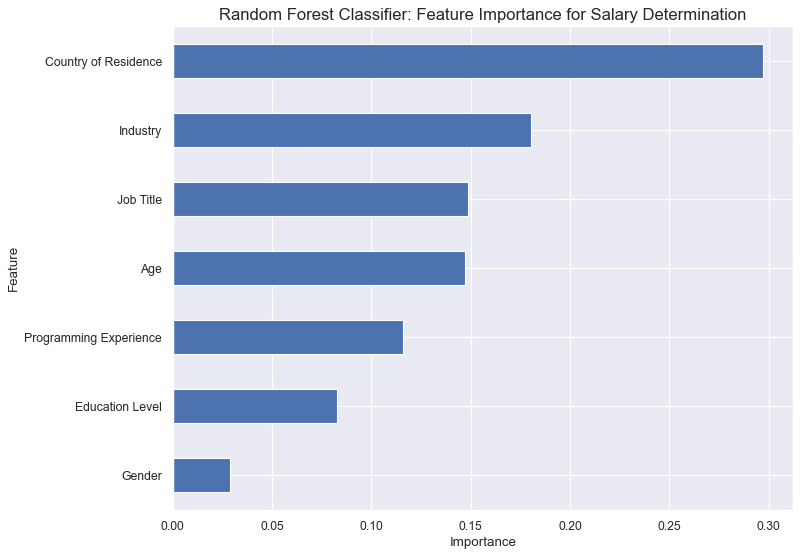

In [130]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Random Forest Classifier: Feature Importance for Salary Determination", fontsize=15)
plt.ylabel('Feature', size=12)
plt.xlabel('Importance', size=12)
feat_importances = pd.Series(clf.feature_importances_, index= X.columns)
feat_importances.nlargest(7).sort_values().plot(kind='barh')

In [131]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1641  202   65   74   21   69    0]
 [ 466  155   67   41   13   26    0]
 [ 177   78   56   64   14   27    0]
 [ 205   72   40  100   22   88    0]
 [  39   28   23   37   14   74    0]
 [ 111   41   25   73   24  319    2]
 [   8    5    1    1    0   10    0]]


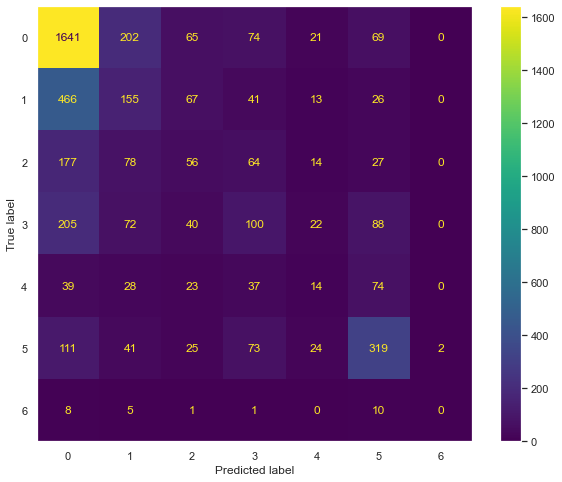

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.grid(False)

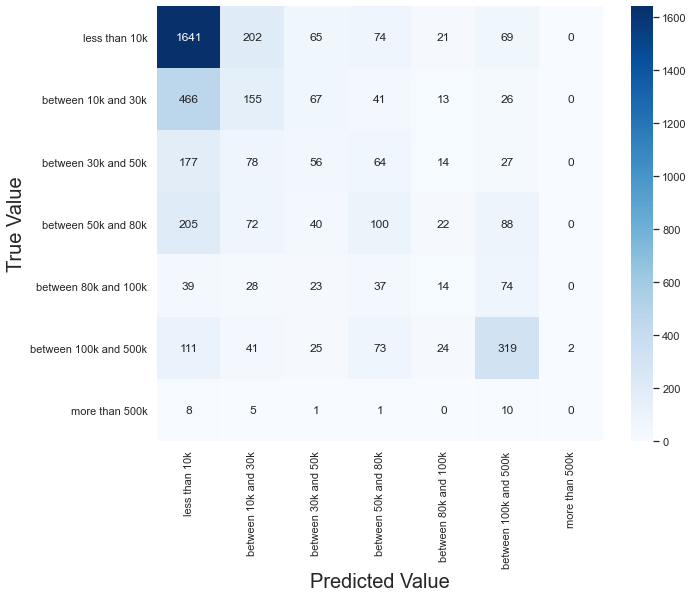

In [133]:
sns.set(rc = {'figure.figsize':(10,8)})
cm = confusion_matrix(y_test, y_pred)
rfc_cm = sns.heatmap(cm, annot=True, cmap='Blues', fmt = 'g', xticklabels=classes, yticklabels=classes)
rfc_cm.set_xlabel("Predicted Value", fontsize = 20)
rfc_cm.set_ylabel("True Value", fontsize = 20)
rfc_cm

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.79      0.70      2072
           1       0.27      0.20      0.23       768
           2       0.20      0.13      0.16       416
           3       0.26      0.19      0.22       527
           4       0.13      0.07      0.09       215
           5       0.52      0.54      0.53       595
           6       0.00      0.00      0.00        25

    accuracy                           0.49      4618
   macro avg       0.29      0.27      0.27      4618
weighted avg       0.44      0.49      0.46      4618



In [135]:
rfc=RandomForestClassifier(random_state=42)

In [136]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [137]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train.values.ravel())
CV_rfc.cv_results_

{'mean_fit_time': array([0.65629978, 1.49854584, 0.56115956, 1.49805994, 0.58819098,
        1.41922469, 0.61356831, 1.46953721, 0.58470445, 1.48236632,
        0.58782101, 1.49980645, 0.77291389, 1.58990326, 0.64567404,
        1.57800841, 0.62442269, 1.60704274, 0.6818891 , 1.71250095,
        0.70036654, 1.737498  , 0.70237498, 1.71582384, 0.75036983,
        1.89187255, 0.73348794, 1.89927135, 0.76263118, 1.8699193 ,
        0.55206747, 1.40898104, 0.56846776, 1.37209959, 0.57330689,
        1.40982175, 0.60893807, 1.56145058, 0.61991749, 1.51778145,
        0.66623154, 1.70003548, 0.88066497, 2.07524614, 0.76802626,
        1.92472162, 0.70052147, 1.84245648, 0.77548952, 2.2070528 ,
        0.90611167, 2.0085855 , 0.77033629, 1.93275928, 0.83363781,
        2.09442821, 0.830127  , 2.13969221, 0.83033552, 2.10278454]),
 'std_fit_time': array([0.04381945, 0.09277751, 0.00580836, 0.09014157, 0.01865363,
        0.04155662, 0.01248594, 0.02557074, 0.00387926, 0.01307724,
        0.012

In [138]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [139]:
CV_rfc.best_score_

0.5232531285882629

In [140]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')
rfc1.fit(X_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

In [141]:
y_pred=rfc1.predict(X_test)

In [142]:
model_RFC_1 = accuracy_score(y_test, y_pred)
model_RFC_1

0.5223040277176266

In [143]:
rfc_cv_score = cross_val_score(clf, X_train, y_train, cv=10)

C:\Users\annak\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\annak\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\annak\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\annak\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

In [144]:
rfc_cv_score

array([0.49721707, 0.49165121, 0.52319109, 0.50603528, 0.48932219,
       0.48746518, 0.49582173, 0.49303621, 0.50510678, 0.51810585])

In [145]:
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Mean AUC Score - Random Forest:  0.5006952591114947


In [146]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)

In [147]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

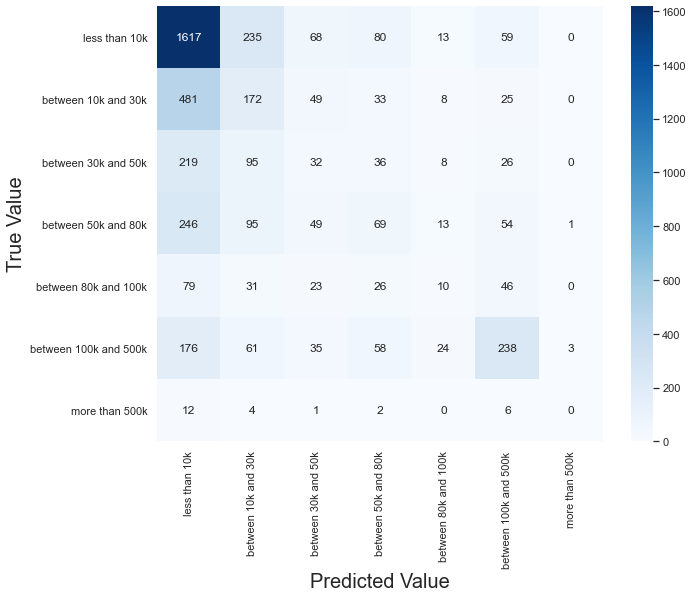

In [148]:
sns.set(rc = {'figure.figsize':(10,8)})
cm = confusion_matrix(y_test, y_pred)
knn_cm = sns.heatmap(cm, annot=True, cmap='Blues', fmt = 'g', xticklabels=classes, yticklabels=classes)
knn_cm.set_xlabel("Predicted Value", fontsize = 20)
knn_cm.set_ylabel("True Value", fontsize = 20)
knn_cm

In [149]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.46297098310957124


In [150]:
model_KNN =  accuracy_score(y_test, y_pred)
model_KNN

0.46297098310957124

In [151]:
print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.6644
Test set score: 0.4630


In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.78      0.66      2072
           1       0.25      0.22      0.24       768
           2       0.12      0.08      0.10       416
           3       0.23      0.13      0.17       527
           4       0.13      0.05      0.07       215
           5       0.52      0.40      0.45       595
           6       0.00      0.00      0.00        25

    accuracy                           0.46      4618
   macro avg       0.26      0.24      0.24      4618
weighted avg       0.41      0.46      0.42      4618



In [153]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train.values.ravel())
print(grid_search.best_params_)
accuracy = grid_search.best_score_ 
print(accuracy)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'n_neighbors': 30}
0.5064523353023154


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   21.2s finished


In [154]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test) 
model_KNN_1=accuracy_score(y_test, y_pred)

<ipython-input-154-08b82e78acc4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


In [155]:
model_KNN_1

0.498051104374188

In [156]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.5372
Test set score: 0.4981


In [157]:
Acc_Score = [model_LGBM_1, model_RFC_1, model_KNN_1]
models = ['Light Gradient Boosting Machine Classifier', 'Random Forest Classifier', 'K-Nearest Neighbors Classifier']

results_df = pd.DataFrame({'Model Accuracy Scores on Testing Data': Acc_Score}, index = models) 
results_df

,Model Accuracy Scores on Testing Data
Light Gradient Boosting Machine Classifier,0.553486
Random Forest Classifier,0.522304
K-Nearest Neighbors Classifier,0.498051


In [158]:
Acc_Score = [model_LGBM, model_RFC, model_KNN]
models = ['Light Gradient Boosting Machine Classifier', 'Random Forest Classifier', 'K-Nearest Neighbors Classifier']

results_df = pd.DataFrame({'Model Accuracy Scores on Testing Data': Acc_Score}, index = models) 
results_df

,Model Accuracy Scores on Testing Data
Light Gradient Boosting Machine Classifier,0.545691
Random Forest Classifier,0.494803
K-Nearest Neighbors Classifier,0.462971


In [74]:
from sklearn.metrics import mean_squared_error as MSE
k_list = list(range(1,50))
cv_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.4183605424950431, 0.45632373992899267, 0.46319321347176495, 0.47396059968682336, 0.4773971021682919, 0.48807249919466394, 0.48797990708058353, 0.4905775680745836, 0.49002046501051677, 0.4906705047174606, 0.49837477153434173, 0.501903435468895, 0.5009744135689221, 0.5000468559163347, 0.5033889575075409, 0.5016253145978574, 0.5012534818941504, 0.5008819937192401, 0.5015326363515779, 0.500696034301287, 0.5032029119573888, 0.5046882617316362, 0.503296106996863, 0.5047812845067123, 0.5053378707775844, 0.5054304628916647, 0.5046880894672379, 0.5062665481487607, 0.5045959280141533, 0.5064523353023154, 0.5071948809911404, 0.5082151168900074, 0.5081226109081263, 0.5092355250532727, 0.509514593378501, 0.5095150240394968, 0.5102579142571184, 0.5096077022857763, 0.5098866844788054, 0.5106293162998295, 0.512950148405779, 0.511279097610176, 0.511092535266829, 0.5106287133744356, 0.5115574768778112, 0.5110936549854178, 0.51248589585239, 0.5120214710346028, 0.5126715968737457]
cv_scores mean:0.4998

In [ ]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
best_k=k_list[MSE.index(min(MSE))]
print("The optimal Number of neighbours is %d" % best_k)

In [ ]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test.values.ravel()))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)